# Dueling Double DQN

_Ismaël Bonneau_


## Modèle & architecture


### Architecture du réseau de neurones:

L'architecture du modèle est composée d'un premier réseau de convolution, qui va prendre en entrée les frames du jeu (généralement stackées par groupe, nous verrons ça plus tard)

<img src="images/dueling-q-network.png" width="600">

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Nous allons appliquer ce modèle sur un jeu bien connu, super Mario bros.

Ce jeu n'est pas disponible dans l'environnement gym par défaut. Il doit être installé à part (avec d'autres packages comme pyNes)

<img src="images/mario.gif" width="400">

In [5]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import pprint
pp = pprint.PrettyPrinter(indent=4)

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

frame shape:  (240, 256, 3)
game status: 
{   'coins': 0,
    'flag_get': False,
    'life': 2,
    'score': 0,
    'stage': 1,
    'status': 'small',
    'time': 400,
    'world': 1,
    'x_pos': 40,
    'x_pos_screen': 40,
    'y_pos': 79}


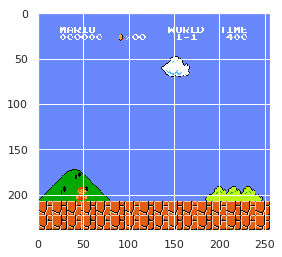

In [9]:
state = env.reset()
state, reward, done, info = env.step(env.action_space.sample())

print("frame shape: ", state.shape)
print("game status: ")
pp.pprint(info)
plt.imshow(state)
plt.show()